# Imports

In [27]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# set seed for reproducibility
seed_val = 9000
np.random.seed(seed_val)

# Function: plot loss per epoch

In [45]:
def loss_plot(history, epochs=20):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(9, 5))
    plt.plot(np.arange(1, epochs + 1), train_acc, marker = 'D', label = 'Training Accuracy')
    plt.plot(np.arange(1, epochs + 1), val_acc, marker = 'o', label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train/Validation Accuracy')
    plt.legend()
    plt.margins(0.02)
    plt.show()
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(9, 5))
    plt.plot(np.arange(1, epochs + 1), train_loss, marker = 'D', label = 'Training Loss')
    plt.plot(np.arange(1, epochs + 1), val_loss, marker = 'o', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train/Validation Loss')
    plt.legend()
    plt.margins(0.02)
    plt.show()
     

# Function: square max pooling

In [29]:
def square_max_pool(image, pool_size=2):
    result = np.zeros((14,14))

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i,j] = np.max(image[i*pool_size : i*pool_size+pool_size,
                                 j*pool_size : j*pool_size+pool_size])
    return result

# Data

## Load data and summary

In [30]:
# unpack mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Size of the training_set: ', X_train.shape)
print('Size of the test_set: ', X_test.shape)
print('Shape of each image: ', X_train[0].shape)
print('Total number of classes: ', len(np.unique(y_train)))
print('Unique class labels: ', np.unique(y_train))

Size of the training_set:  (60000, 28, 28)
Size of the test_set:  (10000, 28, 28)
Shape of each image:  (28, 28)
Total number of classes:  10
Unique class labels:  [0 1 2 3 4 5 6 7 8 9]


## Inspect data

In [31]:
# Plot of 9 random images
for i in range(0, 9):
    plt.subplot(331+i) # plot of 3 rows and 3 columns
    plt.axis('off') # turn off axis
    plt.imshow(X_train[i], cmap='gray') # gray scale

## Max and min values in data

In [6]:
# maximum and minimum pixel values
print('Maximum pixel value in the training_set: ', np.max(X_train))
print('Minimum pixel value in the training_set: ', np.min(X_train))

Maximum pixel value in the training_set:  255
Minimum pixel value in the training_set:  0


## Divide into train and validation

In [32]:
# create train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify = y_train,
                                                  test_size = 0.08333,
                                                  random_state=42)
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print('Training Examples', X_train.shape[0])
print('Validation Examples', X_val.shape[0])
print('Test Examples', X_test.shape[0])

Training Examples 55000
Validation Examples 5000
Test Examples 10000


# Hyperparameters

In [33]:
# Number of epochs
epochs = 20

# Batchsize
batch_size = 128

# Optimizer for the generator
from keras.optimizers import Adam
optimizer = Adam(lr=0.0001)

# Shape of the input image
input_shape = (28, 28, 1)

# Model: Multi-layer Perceptron (MLP)

## Compile the model

In [34]:
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense
# First hidden layer
model.add(Dense(300, input_shape=(784,), activation = 'relu'))

# Second hidden layer
model.add(Dense(300, activation='relu'))

# Final layer - the final layer has 10 neurons as we need it to predict scores for 10 classes.
# The activation function that has been chosen here is softmax so that
# we can limit the scores between 0 and 1, and the sum of scores to 1.
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer , metrics = ['accuracy'])

# print model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [11]:
# fit the model
history = model.fit(X_train,
                    y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (X_val, y_val))


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
  128/55000 [..............................] - ETA: 37s - loss: 83.3678 - accuracy: 0.1094

2022-07-08 16:25:54.815477: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-07-08 16:25:54.838252: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3699850000 Hz
2022-07-08 16:25:54.838657: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5598736c1030 executing computations on platform Host. Devices:
2022-07-08 16:25:54.838678: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-07-08 16:25:54.864736: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not 

55000/55000 [==============================] - 1s 20us/step - loss: 6.0098 - accuracy: 0.8127 - val_loss: 2.3077 - val_accuracy: 0.8980
Epoch 2/20
55000/55000 [==============================] - 1s 18us/step - loss: 1.5109 - accuracy: 0.9209 - val_loss: 1.5869 - val_accuracy: 0.9196
Epoch 3/20
55000/55000 [==============================] - 1s 18us/step - loss: 0.8840 - accuracy: 0.9433 - val_loss: 1.2903 - val_accuracy: 0.9266
Epoch 4/20
55000/55000 [==============================] - 1s 18us/step - loss: 0.5654 - accuracy: 0.9562 - val_loss: 1.0621 - val_accuracy: 0.9338
Epoch 5/20
55000/55000 [==============================] - 1s 18us/step - loss: 0.3685 - accuracy: 0.9673 - val_loss: 1.0363 - val_accuracy: 0.9310
Epoch 6/20
55000/55000 [==============================] - 1s 18us/step - loss: 0.2580 - accuracy: 0.9731 - val_loss: 0.9394 - val_accuracy: 0.9416
Epoch 7/20
55000/55000 [==============================] - 1s 18us/step - loss: 0.1745 - accuracy: 0.9797 - val_loss: 0.8356 - val

## Evaluate model

In [12]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 0s 13us/step
Test loss: 0.7292534246602997
Accuracy: 0.9609000086784363


## Plot the model

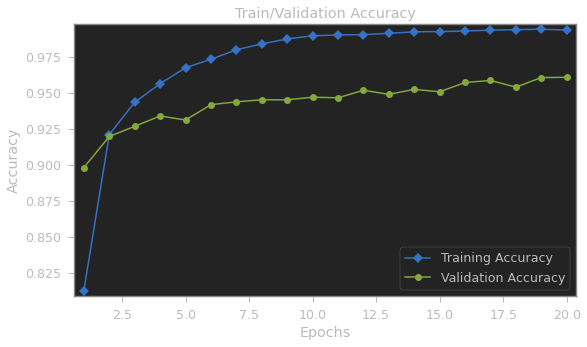

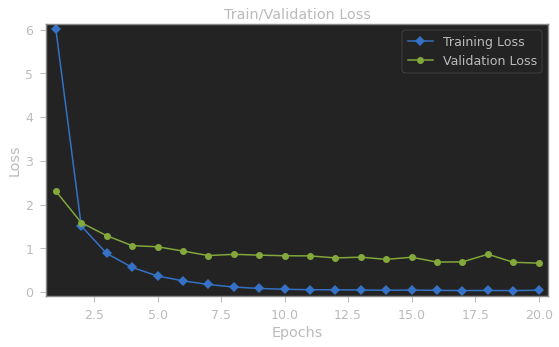

In [17]:
# plot training loss
loss_plot(history)

# Model: Convolution

## Understanding convolution

Consider the following example:

    array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
    kernel = np.array([-1, 1, 0])

Here, you have a target array of length 10 and a kernel of length 3. When you start the convolution, implement the following steps:
1. The kernel will be multiplied with the subset of the target array within indices 0 through 2. This will be between [-1,1,0] (kernel) and [0,1,0] (from index 0 through to 2 of the target array). The result of this \textbf{element-wise multiplication} will then be summed up to obtain what is called the result of convolution.
2. The kernel will then be stridden by 1 unit and then multiplied with the subset of the target array within the indices 1 through 3, just like in Step 1, and the result is obtained.
3. Step 2 is repeated until a subset equal to the length of the kernel is not possible at a new stride location.

The result of convolution at each stride is stored in an array. This array that's holding the result of the convolution is called the feature map. The length of the 1-D feature map (with step/stride of 1) is equal to the difference in length of the kernel and the target array plus 1.

Only in this case, we need to take the following equation into account:
\begin{align}
    length\ of\ the\ feature\ map = length\ of\ the\ target\ array\ - length\ of\ the\ kernel\ + 1
\end{align}

In [19]:
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
kernel = np.array([-1, 1, 0])

# empty feature map
conv_result = np.zeros(array.shape[0] - kernel.shape[0] + 1).astype(int)

for i in range(array.shape[0] - kernel.shape[0] +1):
    # convolving
    conv_result[i] = (kernel * array[i:i+3]).sum()
    print(kernel, '*', array[i:i+3], '=', conv_result[i])
    
print('\nFeature Map :', conv_result)

[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1

Feature Map : [ 1 -1  1 -1  1 -1  1 -1]


## Compile the model

In [35]:
from keras.layers import Conv2D

# reshape data
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print('Train data shape:', X_train.shape)
print('Val data shape:', X_val.shape)
print('Test data shape:', X_test.shape, '\n')

# First hidden convolutional layer (2D)
# units: 32 (number of kernels/filters)
# kernel_size: (3,3) (size of each kernel)
# input_shape: 28*28*1 (shape of the input array it will receive)
# activation: relu
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))

# The Flatten function converts all of the 2-D feature maps into a single Dense layer.
from keras.layers import Flatten
model.add(Flatten())

# Second hidden layer
model.add(Dense(128, activation = 'relu'))

# Final layer
model.add(Dense(10, activation = 'softmax'))

# compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
   
# print model summary
model.summary()

Train data shape: (55000, 28, 28, 1)
Val data shape: (5000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1) 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               2769024   
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [23]:
history = model.fit(X_train,
                    y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 10s 182us/step - loss: 0.8370 - accuracy: 0.8973 - val_loss: 0.1813 - val_accuracy: 0.9468
Epoch 2/20
55000/55000 [==============================] - 10s 181us/step - loss: 0.1198 - accuracy: 0.9670 - val_loss: 0.1314 - val_accuracy: 0.9628
Epoch 3/20
55000/55000 [==============================] - 10s 181us/step - loss: 0.0647 - accuracy: 0.9813 - val_loss: 0.1102 - val_accuracy: 0.9708
Epoch 4/20
55000/55000 [==============================] - 10s 181us/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.1091 - val_accuracy: 0.9686
Epoch 5/20
55000/55000 [==============================] - 10s 181us/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0984 - val_accuracy: 0.9740
Epoch 6/20
55000/55000 [==============================] - 10s 181us/step - loss: 0.0125 - accuracy: 0.9972 - val_loss: 0.1034 - val_accuracy: 0.9728
Epoch 7/20
55000/55000 [==============================] -

## Evaluate the model

In [24]:
# evaluate model
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 1s 58us/step
Test loss: 0.11066446484106472
Accuracy: 0.9818000197410583


## Plot the model

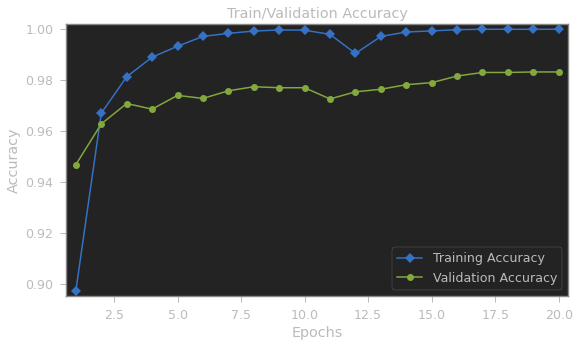

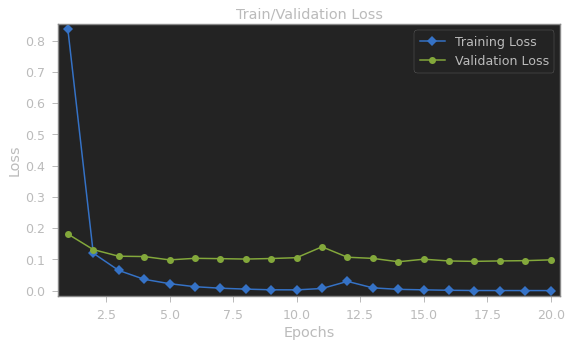

In [25]:
# plot training loss
loss_plot(history)

# Pooling

Max pooling can be defined as the process of summarizing a group of values with the maximum value within that group. Similarly, if you computed the average, it would be average pooling. Pooling operations are usually performed on the generated feature maps after convolution to reduce the number of parameters.

## 1D max-pooling

In [1]:
 # 1D Max Pooling
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1]) 
result = np.zeros(len(array)//2)

for i in range(len(array)//2):
    result[i] = np.max(array[2*i:2*i+2])

result

array([1., 1., 1., 1., 1.])

## 1D average pooling

In [2]:
# 1D Average Pooling
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
result = np.zeros(len(array)//2)

for i in range(len(array)//2):
    result[i] = np.mean(array[2*i:2*i+2])
    
result

array([0.5, 0.5, 0.5, 0.5, 0.5])

## Max pooling for a digit

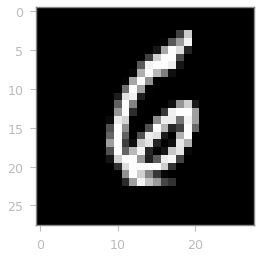

In [10]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

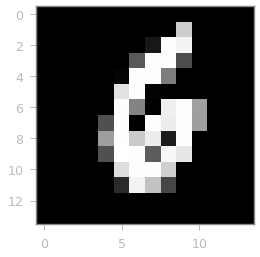

In [12]:
# plot a pooled image
plt.imshow(square_max_pool(X_train[0].reshape(28,28)), cmap='gray')

The convolution classifier that we built in the previous section has around 2.7 million parameters. It has been proven that having a lot of parameters can lead to overfitting in a lot of cases. This is where pooling comes in. It helps us to retain the important features in the data as well as reduce the number of parameters.

# Model: Convolution with pooling

## Compile the model

In [36]:
from keras.layers import MaxPool2D

# model
model = Sequential()

# First 2D convolutional hidden layer
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))

# 2D max pooling of the 2D convolutional layer
model.add(MaxPool2D(2,2))

# Flatten the 2D layer to transform it into a 1D layer
model.add(Flatten())

# 2nd hidden layer
model.add(Dense(128, activation='relu'))

# Final layer
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# print model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [24]:
# fit model
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 94us/step - loss: 0.7285 - accuracy: 0.9103 - val_loss: 0.1983 - val_accuracy: 0.9464
Epoch 2/20
55000/55000 [==============================] - 5s 91us/step - loss: 0.1323 - accuracy: 0.9643 - val_loss: 0.1479 - val_accuracy: 0.9604
Epoch 3/20
55000/55000 [==============================] - 5s 92us/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.1216 - val_accuracy: 0.9694
Epoch 4/20
55000/55000 [==============================] - 5s 91us/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.1050 - val_accuracy: 0.9706
Epoch 5/20
55000/55000 [==============================] - 5s 92us/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.1048 - val_accuracy: 0.9724
Epoch 6/20
55000/55000 [==============================] - 5s 92us/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0964 - val_accuracy: 0.9780
Epoch 7/20
55000/55000 [==============================] - 5s 92us/ste

## Evaluate the model

In [25]:
# evaluate model
loss, acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 0s 34us/step
Test loss: 0.09886727244268127
Accuracy: 0.9815999865531921


## Plot the model

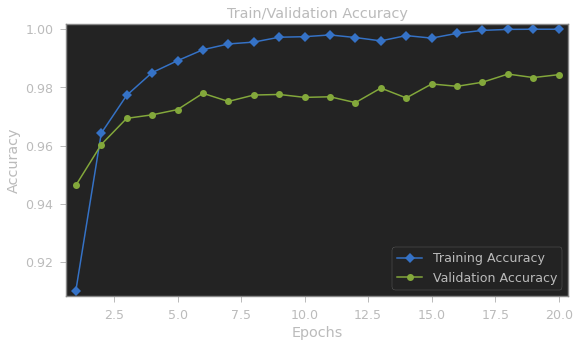

In [26]:
# plot training loss
loss_plot(history)

# Dropout

Dropout is a regularization technique used to prevent overfitting. During training, it is implemented by randomly sampling a neural network from the original neural network during each forward and backward propagation, and then training this subset network on the batch of input data. During testing, no dropout is implemented. The test results are obtained as an ensemble of all of the sampled networks.

# Model: Convolution with pooling and dropout

## Compile the model

In [37]:
from keras.layers import Dropout

# model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
   
# model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)              

## Fit the model

In [38]:
# fit model
history = model.fit(X_train, y_train, epochs = epochs,
                    batch_size = batch_size, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 118us/step - loss: 3.5061 - accuracy: 0.6767 - val_loss: 0.5817 - val_accuracy: 0.8414
Epoch 2/20
55000/55000 [==============================] - 6s 116us/step - loss: 0.7542 - accuracy: 0.8063 - val_loss: 0.3867 - val_accuracy: 0.9014
Epoch 3/20
55000/55000 [==============================] - 6s 117us/step - loss: 0.5526 - accuracy: 0.8609 - val_loss: 0.2840 - val_accuracy: 0.9272
Epoch 4/20
55000/55000 [==============================] - 6s 116us/step - loss: 0.4181 - accuracy: 0.8919 - val_loss: 0.2277 - val_accuracy: 0.9414
Epoch 5/20
55000/55000 [==============================] - 6s 117us/step - loss: 0.3352 - accuracy: 0.9142 - val_loss: 0.1791 - val_accuracy: 0.9560
Epoch 6/20
55000/55000 [==============================] - ETA: 0s - loss: 0.2724 - accuracy: 0.92 - 6s 116us/step - loss: 0.2721 - accuracy: 0.9288 - val_loss: 0.1526 - val_accuracy: 0.9606
Epoch 7/20
55000/5500

## Evaluate the model

In [39]:
# evaluate model
loss, acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 0s 36us/step
Test loss: 0.0643784402999183
Accuracy: 0.9847999811172485


## Plot the model

In [40]:
# plot training loss
loss_plot(history)

# Going deeper

The convolution classifier with max pooling and dropout seems to be the best classifier so far. However, we also noticed that there was a slight amount of overfitting on the train data.
Let's build a deeper model to see if we can create a classifier that is more accurate than the other models we have trained so far, and see if we can get it to reach an even better minima.
We will build a deeper model by adding two more convolution layers to our best model so far:
* The first layer is a convolution 2-D layer with 32 filters of size 3\*3 with activation as relu, followed by downsampling with max pooling of size 2\*2, followed by Dropout as the regularizer
* The second layer is a convolution 2-D layer with 64 filters of size 3\*3 with activation as relu, followed by downsampling with max pooling of size 2\*2, followed by Dropout as the regularizer
* The third layer is a convolution 2-D layer with 128 filters of size 3\*3 with activation as relu, followed by downsampling with max pooling of size 2\*2, followed by Dropout as the regularizer

## Compile the model

In [41]:
# model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
   
# print model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)       

## Fit the model

In [42]:
# fit model
history = model.fit(X_train, y_train, epochs = 40, batch_size=batch_size, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 9s 169us/step - loss: 2.0441 - accuracy: 0.5152 - val_loss: 0.5663 - val_accuracy: 0.8618
Epoch 2/40
55000/55000 [==============================] - 9s 165us/step - loss: 0.7515 - accuracy: 0.7579 - val_loss: 0.2998 - val_accuracy: 0.9152
Epoch 3/40
55000/55000 [==============================] - 9s 165us/step - loss: 0.5239 - accuracy: 0.8385 - val_loss: 0.2218 - val_accuracy: 0.9350
Epoch 4/40
55000/55000 [==============================] - 9s 166us/step - loss: 0.4123 - accuracy: 0.8734 - val_loss: 0.1719 - val_accuracy: 0.9492
Epoch 5/40
55000/55000 [==============================] - 9s 165us/step - loss: 0.3350 - accuracy: 0.8973 - val_loss: 0.1433 - val_accuracy: 0.9556
Epoch 6/40
55000/55000 [==============================] - 9s 165us/step - loss: 0.2922 - accuracy: 0.9113 - val_loss: 0.1239 - val_accuracy: 0.9610
Epoch 7/40
55000/55000 [==============================] - 9s 16

## Evaluate the model

In [43]:
# evaluate model
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 0s 48us/step
Test loss: 0.039592917809658686
Accuracy: 0.9890999794006348


## Plot the model

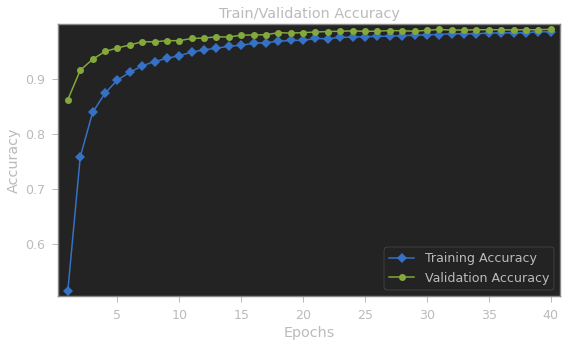

In [46]:
# plot training loss
loss_plot(history, epochs=40)

# Data augmentation

Imagine a situation where you might want to build a convolution classifier on a small set of images. The problem here is that the classifier will easily overfit on this small set of data. The reason why the classifier will overfit is that there are very few images that are similar. That is, there are not a lot of variations for the model to capture within a specific class so that it can be robust and perform well on new data

## Using ImageDataGenerator

### Transform data

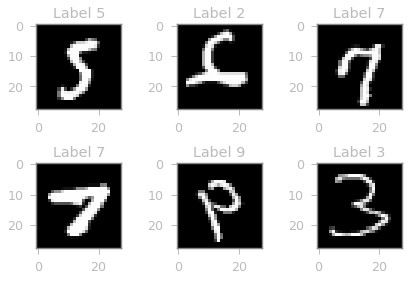

In [47]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip=True)

# fit the augmenter
train_datagen.fit(X_train)

# transform the data
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break

plt.tight_layout()
plt.show()

### Zoom augmenter

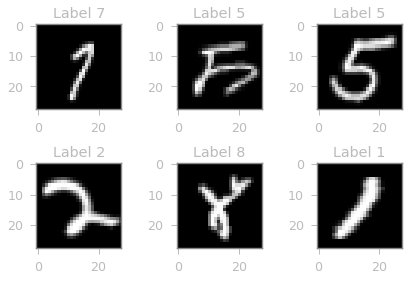

In [48]:
train_datagen = ImageDataGenerator(zoom_range=0.3)

#fit
train_datagen.fit(X_train)

#transform
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break
   
plt.tight_layout()
plt.show()

# Model: ConvNet with ImageDataGenerator

## Compile the model

In [50]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    horizontal_flip = True)

train_datagen.fit(X_train)

# define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
   
# compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

# print model summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)       

## Fit the model

In [51]:
# fit the model on batches with real-time data augmentation
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size = 128),
                              steps_per_epoch=len(X_train) / 128, epochs = 10,
                              validation_data=(train_datagen.flow(X_val, y_val)))

Epoch 1/10
430/429 [==============================] - 10s 24ms/step - loss: 1.1210 - accuracy: 0.6207 - val_loss: 1.1416 - val_accuracy: 0.8194
Epoch 2/10
430/429 [==============================] - 10s 24ms/step - loss: 0.6685 - accuracy: 0.7773 - val_loss: 0.3144 - val_accuracy: 0.8584
Epoch 3/10
430/429 [==============================] - 10s 24ms/step - loss: 0.5604 - accuracy: 0.8167 - val_loss: 0.6657 - val_accuracy: 0.8858
Epoch 4/10
430/429 [==============================] - 10s 24ms/step - loss: 0.4974 - accuracy: 0.8392 - val_loss: 0.1555 - val_accuracy: 0.8950
Epoch 5/10
430/429 [==============================] - 10s 24ms/step - loss: 0.4534 - accuracy: 0.8556 - val_loss: 0.5205 - val_accuracy: 0.9028
Epoch 6/10
430/429 [==============================] - 10s 24ms/step - loss: 0.4186 - accuracy: 0.8676 - val_loss: 0.0648 - val_accuracy: 0.9144
Epoch 7/10
430/429 [==============================] - 10s 23ms/step - loss: 0.3901 - accuracy: 0.8751 - val_loss: 0.0777 - val_accuracy:

## Evaluate the model

In [52]:
# transform/augment test data
for test_img, test_lab in train_datagen.flow(X_test, y_test, batch_size = X_test.shape[0]):
    break

# evaluate model on test data
loss,acc = model.evaluate(test_img, test_lab)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 0s 49us/step
Test loss: 0.18518536397218704
Accuracy: 0.9427000284194946


## Plot the model

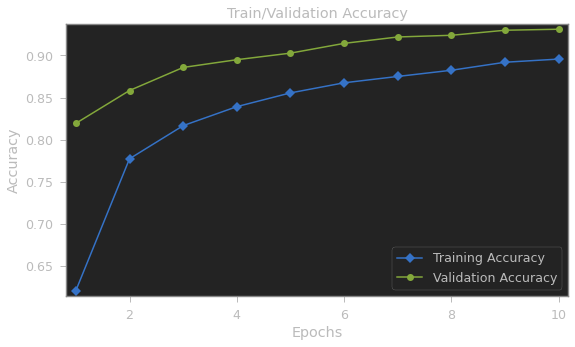

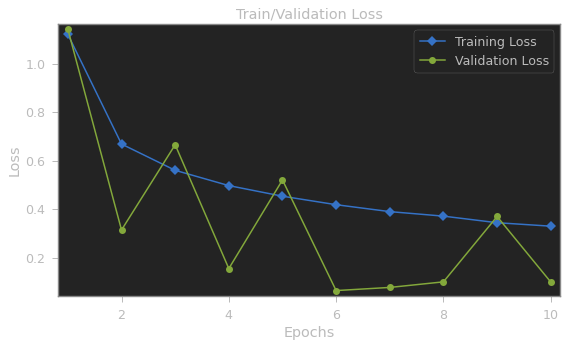

In [53]:
# plot the learning
loss_plot(history, epochs=10)